## Analyzing How News Influences Stock Market Fluctuations

In [3]:
import pandas as pd

# Read the datasets
df_news = pd.read_csv('../data/sentiment.csv')
df_stock = pd.read_csv('../data/stock_data.csv')

In [4]:
df_news.head()

,Date,headline,neg,neu,pos,compound,Sentiment,stock
0,2020-06-05,Stocks That Hit 52-Week Highs On Friday,0.0,1.000,0.000,0.000,Neutral,A
1,2020-06-03,Stocks That Hit 52-Week Highs On Wednesday,0.0,1.000,0.000,0.000,Neutral,A
2,2020-05-26,71 Biggest Movers From Friday,0.0,1.000,0.000,0.000,Neutral,A
3,2020-05-22,46 Stocks Moving In Friday's Mid-Day Session,0.0,1.000,0.000,0.000,Neutral,A
4,2020-05-22,B of A Securities Maintains Neutral on Agilent...,0.0,0.833,0.167,0.296,Positive,A


In [5]:
# Set 'Date' and 'stock' column as part of the index
df_stock = df_stock.set_index('Date')
df_stock = df_stock.set_index('stock', append=True)
df_news = df_news.set_index('Date')
df_news = df_news.set_index('stock', append=True)

In [6]:
# Align the datasets by Date and Stock
aligned_data = pd.merge(df_stock, df_news, 
                        left_index=True, 
                        right_index=True, 
                        how='inner')

In [7]:
# Check the result with the first five rows
aligned_data.head()

Open    High      Low    Close        Volume     SMA_20  \
Date       stock                                                               
2020-06-10 AAPL   84.8417  86.517  84.4013  86.0468  1.708397e+08  87.333615   
           AAPL   84.8417  86.517  84.4013  86.0468  1.708397e+08  87.333615   
           AAPL   84.8417  86.517  84.4013  86.0468  1.708397e+08  87.333615   
           AAPL   84.8417  86.517  84.4013  86.0468  1.708397e+08  87.333615   
           AAPL   84.8417  86.517  84.4013  86.0468  1.708397e+08  87.333615   

                     EMA_20    RSI_14      MACD  MACD_Signal  MACD_Hist  \
Date       stock                                                          
2020-06-10 AAPL   87.531474  41.64221 -3.307468    -3.510702   0.203234   
           AAPL   87.531474  41.64221 -3.307468    -3.510702   0.203234   
           AAPL   87.531474  41.64221 -3.307468    -3.510702   0.203234   
           AAPL   87.531474  41.64221 -3.307468    -3.510702   0.203234   
           AAPL   87.531474  41.64221 -3.307468    -3.510702   0.203234   

                  Daily_Return  Cumulative_Return  \
Date       stock                                    
2020-06-10 AAPL       0.050409           0.668486   
           AAPL       0.050409           0.668486   
           AAPL       0.050409           0.668486   
           AAPL       0.050409           0.668486   
           AAPL       0.050409           0.668486   

                                                           headline    neg  \
Date       stock                                                             
2020-06-10 AAPL   Tech Stocks And FAANGS Strong Again To Start D...  0.000   
           AAPL       10 Biggest Price Target Changes For Wednesday  0.208   
           AAPL   Benzinga Pro's Top 5 Stocks To Watch For Wed.,...  0.208   
           AAPL   Deutsche Bank Maintains Buy on Apple, Raises P...  0.208   
           AAPL   Apple To Let Users Trade In Their Mac Computer...  0.208   

                    neu  pos  compound Sentiment  
Date       stock                                  
2020-06-10 AAPL   1.000  0.0    0.0000   Neutral  
           AAPL   0.792  0.0   -0.2732  Negative  
           AAPL   0.792  0.0   -0.2732  Negative  
           AAPL   0.792  0.0   -0.2732  Negative  
           AAPL   0.792  0.0   -0.2732  Negative

In [8]:
# Check size
aligned_data.shape

(6703, 19)

In [9]:
# Check missing
aligned_data.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume               0
SMA_20               0
EMA_20               0
RSI_14               0
MACD                 0
MACD_Signal          0
MACD_Hist            0
Daily_Return         0
Cumulative_Return    0
headline             0
neg                  0
neu                  0
pos                  0
compound             0
Sentiment            0
dtype: int64

In [10]:
# Check the data types
aligned_data.dtypes

Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
SMA_20               float64
EMA_20               float64
RSI_14               float64
MACD                 float64
MACD_Signal          float64
MACD_Hist            float64
Daily_Return         float64
Cumulative_Return    float64
headline              object
neg                  float64
neu                  float64
pos                  float64
compound             float64
Sentiment             object
dtype: object

#### Aggregate Sentiments

In [11]:
# Ensure 'Date' is in datetime format if not already
aligned_data.index = pd.MultiIndex.from_frame(aligned_data.index.to_frame().assign(Date=pd.to_datetime(aligned_data.index.get_level_values('Date'))))

# Calculate average daily sentiment scores
sentiment_cols = ['neg', 'neu', 'pos', 'compound']
daily_sentiment = aligned_data.groupby(level=['Date', 'stock'])[sentiment_cols].mean()

# Reset index for merging purposes
daily_sentiment = daily_sentiment.reset_index()

In [12]:
# Save it to csv
daily_sentiment.to_csv('../data/daily_sentiment.csv')
daily_sentiment

,Date,stock,neg,neu,pos,compound
0,2011-03-03,NVDA,0.000000,1.000000,0.000000,0.000000
1,2011-03-07,NVDA,0.000000,0.808500,0.191500,0.296000
2,2011-03-08,NVDA,0.058750,0.879500,0.061750,-0.020750
3,2011-03-09,NVDA,0.135000,0.865000,0.000000,-0.175567
4,2011-03-10,NVDA,0.065000,0.935000,0.000000,-0.064000
...,...,...,...,...,...,...
1791,2020-06-10,AAPL,0.173333,0.826667,0.000000,-0.227667
1792,2020-06-10,AMZN,0.000000,1.000000,0.000000,0.000000
1793,2020-06-10,GOOG,0.000000,0.889000,0.111000,0.223500
1794,2020-06-10,NVDA,0.123333,0.827333,0.049333,-0.077733


##### Calculate Stock Movements

In [14]:
daily_retun = aligned_data.reset_index()
print(daily_retun[['Date', 'stock', 'Close', 'Daily_Return']])

           Date stock    Close  Daily_Return
0    2020-06-10  AAPL  86.0468      0.050409
1    2020-06-10  AAPL  86.0468      0.050409
2    2020-06-10  AAPL  86.0468      0.050409
3    2020-06-10  AAPL  86.0468      0.050409
4    2020-06-10  AAPL  86.0468      0.050409
...         ...   ...      ...           ...
6698 2019-07-02  TSLA  14.9700     -0.044061
6699 2019-07-01  TSLA  15.1447      0.011670
6700 2019-07-01  TSLA  15.1447      0.011670
6701 2019-07-01  TSLA  15.1447      0.011670
6702 2019-07-01  TSLA  15.1447      0.011670

[6703 rows x 4 columns]


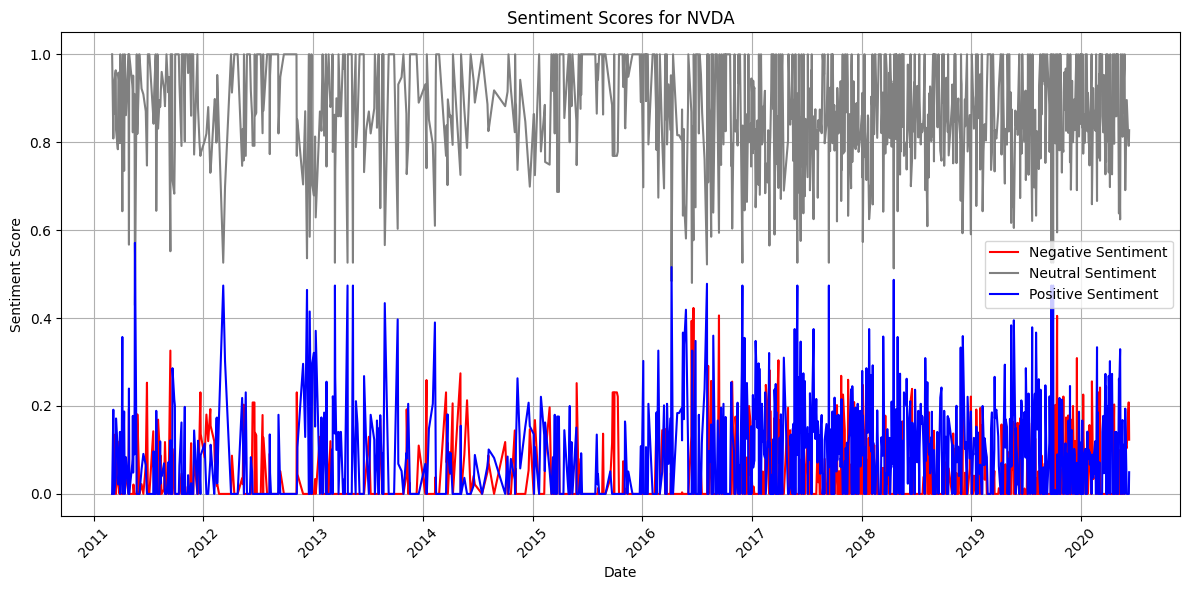

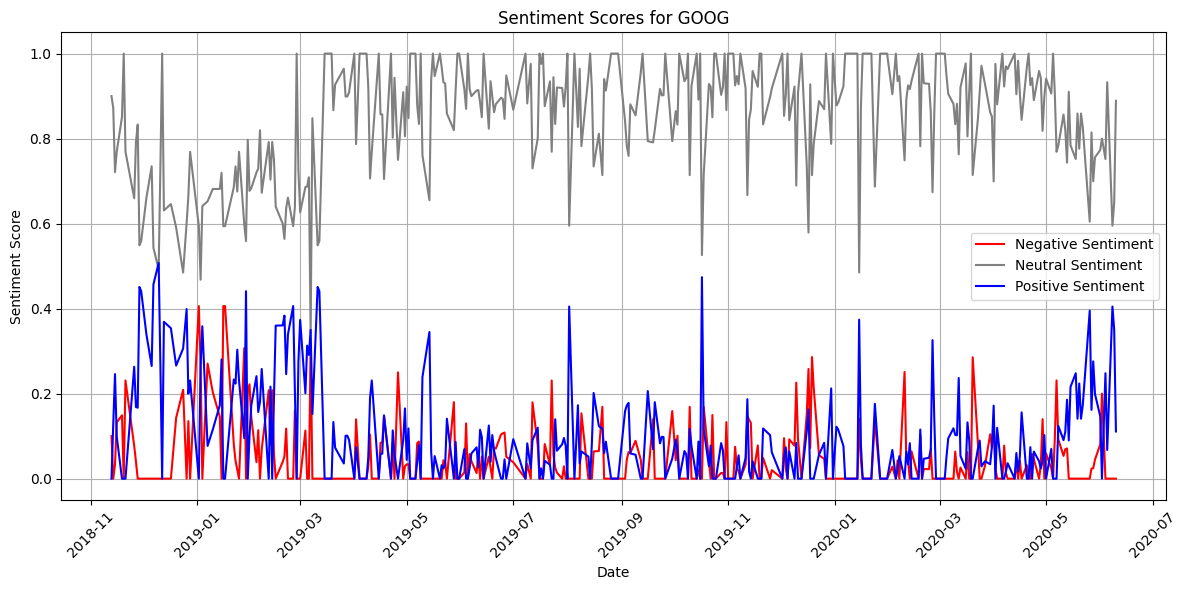

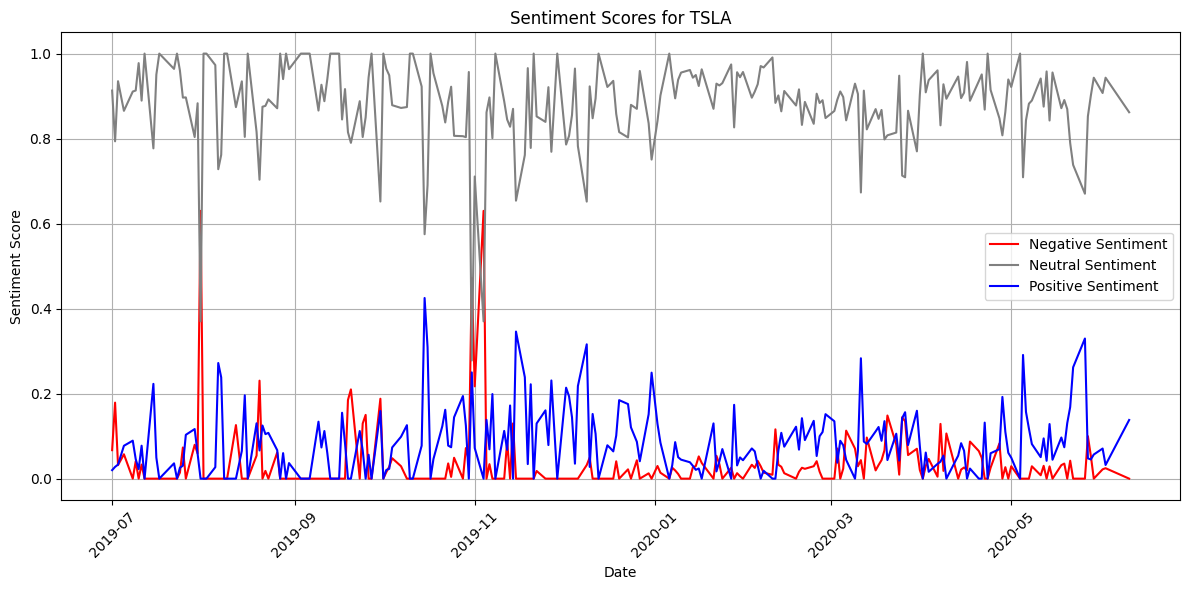

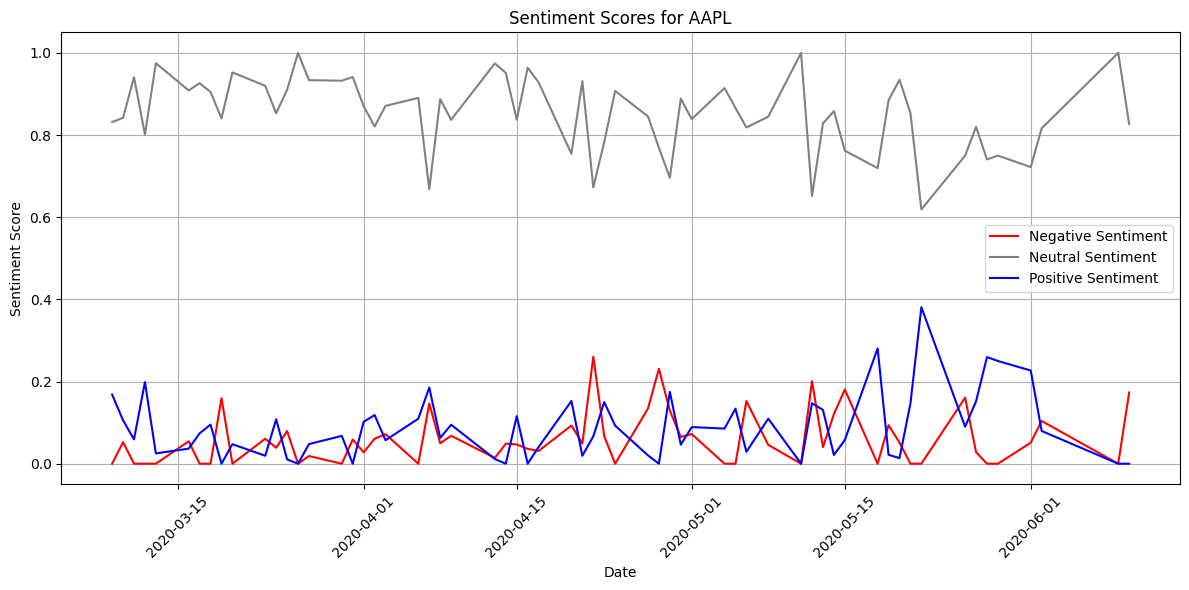

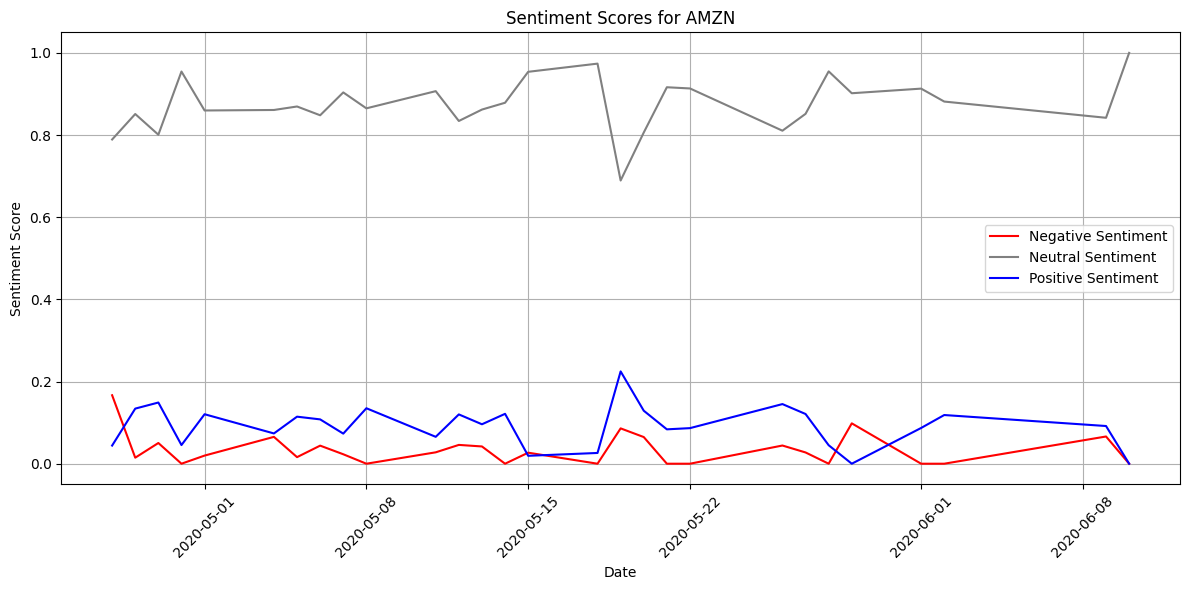

In [18]:
# Plot sentiment scores for each stock
import matplotlib.pyplot as plt
stocks = daily_sentiment['stock'].unique()

for stock in stocks:
    stock_data = daily_sentiment[daily_sentiment['stock'] == stock]
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], stock_data['neg'], label='Negative Sentiment', color='red')
    plt.plot(stock_data['Date'], stock_data['neu'], label='Neutral Sentiment', color='gray')
    plt.plot(stock_data['Date'], stock_data['pos'], label='Positive Sentiment', color='blue')
    #plt.plot(stock_data['Date'], stock_data['compound'], label='Compound Sentiment', color='blue')
    
    plt.title(f'Sentiment Scores for {stock}')
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### Calculate Correlation

In [19]:
def calculate_correlation(df):
    # Assuming 'Daily_Return' is already calculated in your DataFrame
    sentiment_cols = ['neg', 'neu', 'pos', 'compound']
    
    # Calculate the correlation between sentiment scores and daily returns
    correlations = {}
    for col in sentiment_cols:
        correlation = df[col].corr(df['Daily_Return'])
        correlations[col] = correlation
    
    # Convert the correlations to a DataFrame for better visualization
    correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation with Daily Return'])
    
    return correlation_df

# Let's calculate the daily correlation of apple
df = aligned_data.reset_index()
correlation_df = calculate_correlation(df[df['stock']=='AAPL'])
print(correlation_df)

          Correlation with Daily Return
neg                           -0.055138
neu                            0.101031
pos                           -0.075221
compound                      -0.033530
